Jersey No        0
Player           0
Matches          0
Inns             0
Not Out          0
Runs             0
Highest Score    0
Avg              0
Balls faced      0
Strike rate      0
100              0
50               0
4s               0
6s               0
dtype: int64
Player with most matches: Kagiso Rabada, Matches: 17
             Player    Avg
36  Wriddhiman Saha  71.33
4      Ishan Kishan  57.33
  Highest Score  Cleaned_Highest_Score
0          132*                    132
1          106*                    106
2           85*                     85
3           88*                     88
4            99                     99
Total Centuries: 5
                  Player  Strike rate
51        Ajinkya Rahane       105.60
55         Glenn Maxwell       101.88
58         Vijay Shankar       101.04
61         Josh Philippe       101.29
62       Gurkeerat Singh        88.75
65          Kedar Jadhav        93.93
70      Yashasvi Jaiswal        90.90
71         Shreyas Gopal      

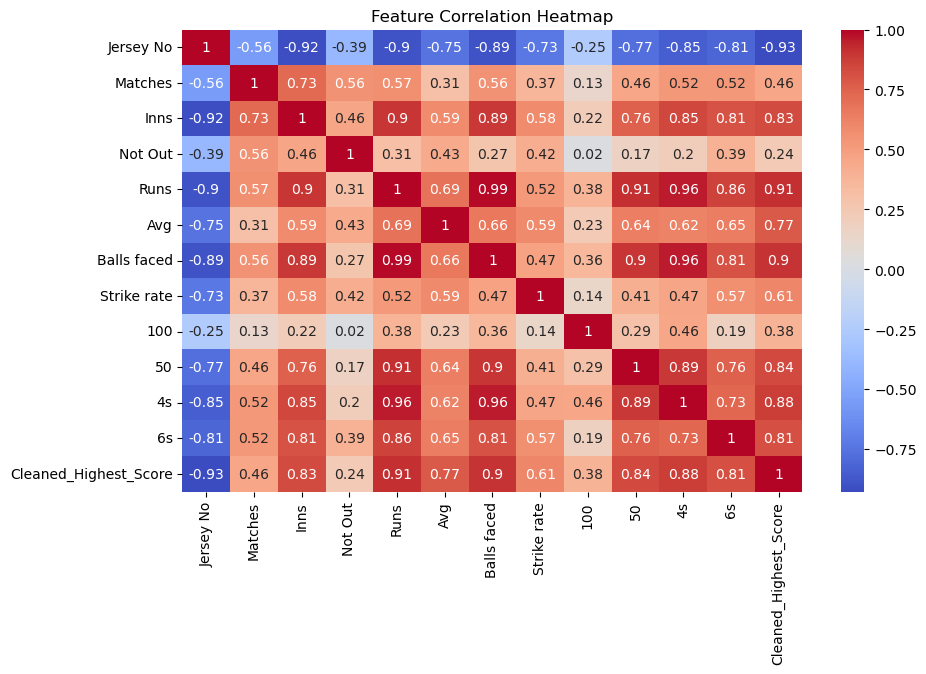

             Player     Avg  Strike rate
0          KL Rahul   55.83       129.34
4      Ishan Kishan   57.33       145.76
31   Kieron Pollard   53.60       191.42
36  Wriddhiman Saha   71.33       139.86
37  Ruturaj Gaikwad   51.00       120.71
57     Deepak Hooda  101.00       142.25
60       Tom Curran   83.00       133.87
             Player    Avg  Balls faced
0          KL Rahul  55.83          518
1    Shikhar Dhawan  44.14          427
4      Ishan Kishan  57.33          354
8       Virat Kohli  42.36          384
9      ABD Villiers  45.40          286
10    Faf Duplessis  40.81          319
14      Eoin Morgan  41.80          302
24  Kane Williamson  45.28          237
27      Chris Gayle  41.14          210
28       Ben Stokes  40.71          200
31   Kieron Pollard  53.60          140
32    Rahul Tewatia  42.50          183
33  Ravindra Jadeja  46.40          135
36  Wriddhiman Saha  71.33          153
37  Ruturaj Gaikwad  51.00          169


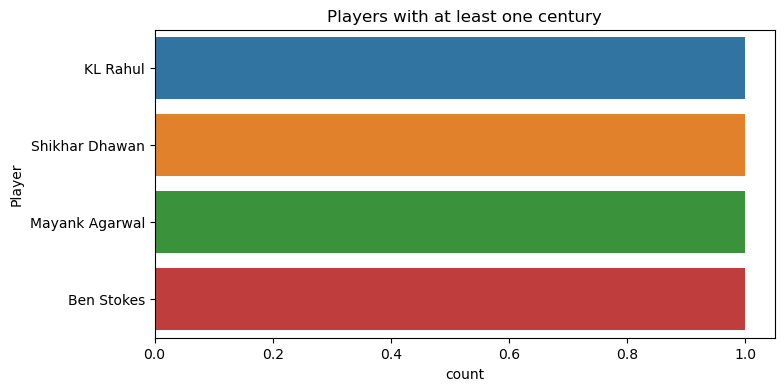

0             KL Rahul
1       Shikhar Dhawan
2         David Warner
4         Ishan Kishan
5         Quinton Kock
6     Suryakumar Yadav
7     Devdutt Padikkal
9         ABD Villiers
10       Faf Duplessis
Name: Player, dtype: object
             Player  4s  6s
0          KL Rahul  58  23
1    Shikhar Dhawan  67  12
2      David Warner  52  14
5      Quinton Kock  46  22
6  Suryakumar Yadav  61  11


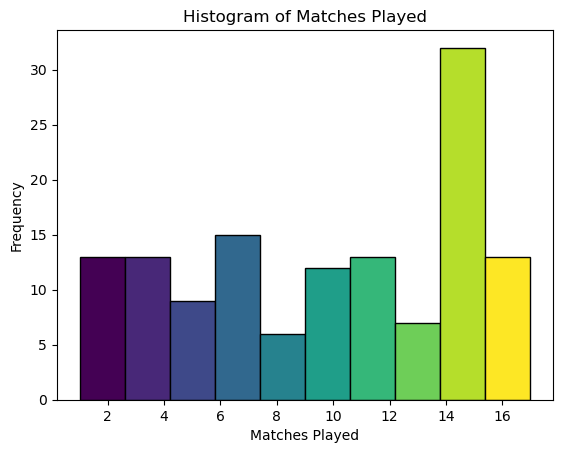

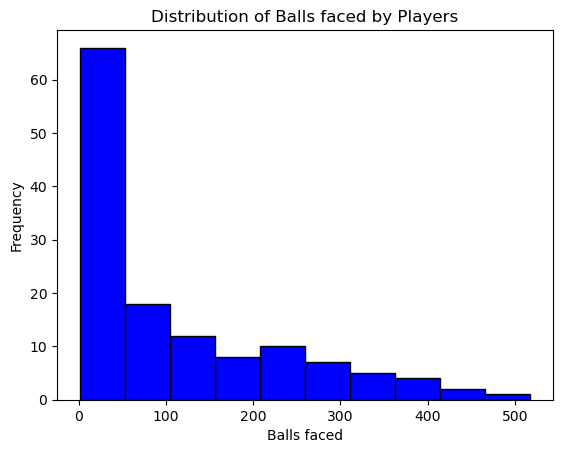

             Player  Runs
0          KL Rahul   670
1    Shikhar Dhawan   618
2      David Warner   548
3      Shreyas Iyer   519
4      Ishan Kishan   516
5      Quinton Kock   503
6  Suryakumar Yadav   480
7  Devdutt Padikkal   473
8       Virat Kohli   466
9      ABD Villiers   454
Series([], Name: Player, dtype: object)
            Player  Boundary_Percentage
109     Andrew Tye           100.000000
48   Andre Russell            76.923077
74    Chris Morris            76.470588
29   Hardik Pandya            73.309609
47    Sunil Narine            72.727273
              Player  Not_Out_Percentage
62   Gurkeerat Singh               100.0
68   Lockie Ferguson               100.0
93       Imran Tahir               100.0
97     Mohammad Nabi               100.0
105     Pravin Dubey               100.0


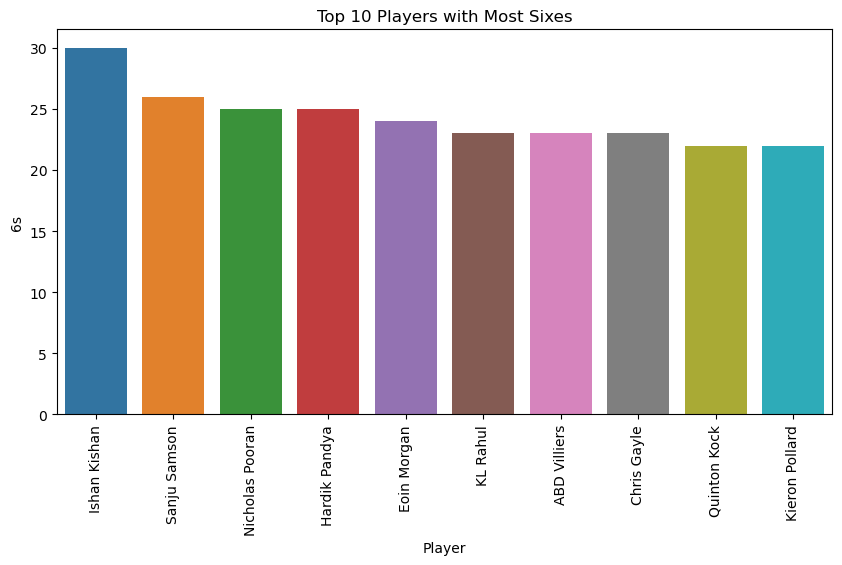

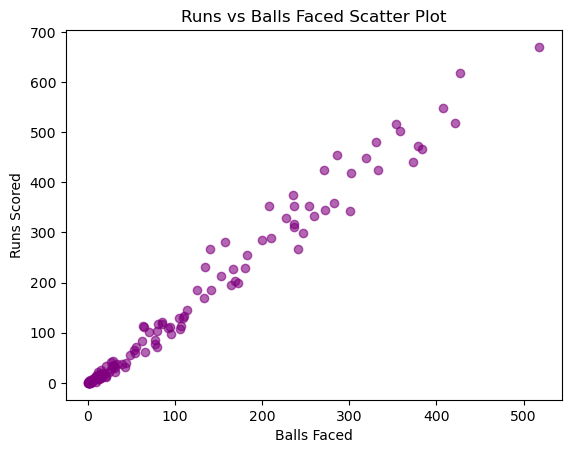

Q20: Correlation between Runs & Balls Faced:
              Balls faced      Runs
Balls faced     1.000000  0.989948
Runs            0.989948  1.000000


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("EDA sheet.csv")

# Check for missing values
print(df.isnull().sum())

# Q1: Maximum matches played by a player in a season
max_matches = df.groupby("Player")["Matches"].max()
player_max_matches = max_matches.idxmax()
print(f"Player with most matches: {player_max_matches}, Matches: {max_matches.max()}")

# Q2: Top 2 players with highest average who have at least 2 half-centuries
top_avg_players = df[df["50"] >= 2].nlargest(2, "Avg")[["Player", "Avg"]]
print(top_avg_players)

# Q3: Create first and last name columns
df[["First Name", "Last Name"]] = df["Player"].str.split(n=1, expand=True)


# Q4: Clean 'Highest Score' column

df['Cleaned_Highest_Score'] = df['Highest Score'].astype(str).str.replace('*', '', regex=False).astype(int)

# Check the cleaned column
print(df[['Highest Score', 'Cleaned_Highest_Score']].head())


# Q5: Total number of centuries scored
total_centuries = df[df["100"] > 0]["100"].sum()
print(f"Total Centuries: {total_centuries}")

# Q6: Players with strike rate less than average strike rate
average_strike_rate = df["Strike rate"].mean()
low_sr_players = df[df["Strike rate"] < average_strike_rate][["Player", "Strike rate"]]
print(low_sr_players)

# Q7: Correlation heatmap
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])  

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Feature Correlation Heatmap")
plt.show()


# Q8: Players with average > 50 and strike rate > 120
high_performance_players = df[(df["Avg"] > 50) & (df["Strike rate"] > 120)]
print(high_performance_players[["Player", "Avg", "Strike rate"]])

# Q9: Players with avg > 40 and balls faced > 100
consistent_players = df[(df["Avg"] > 40) & (df["Balls faced"] > 100)]
print(consistent_players[["Player", "Avg", "Balls faced"]])

# Q10: Players with at least one century
century_players = df[df["100"] >= 1]["Player"]
plt.figure(figsize=(8, 4))
sns.countplot(y=century_players, order=century_players.value_counts().index)
plt.title("Players with at least one century")
plt.show()

# Q11: Players with at least 4 half-centuries
half_century_players = df[df["50"] >= 4]["Player"]
print(half_century_players)

# Q12: Players with more than 45 boundaries and 10 sixes
boundary_six_players = df[(df["4s"] > 45) & (df["6s"] > 10)][["Player", "4s", "6s"]]
print(boundary_six_players)

# Q13: Histogram of matches played
num_bins = 10  # Number of bins
counts, bins, patches = plt.hist(df['Matches'], bins=num_bins, edgecolor='black')
colors = plt.cm.viridis(np.linspace(0, 1, num_bins))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xlabel('Matches Played')
plt.ylabel('Frequency')
plt.title('Histogram of Matches Played')
plt.show()

# Q14: Histogram of balls faced
plt.hist(df["Balls faced"], bins=10, color='blue', edgecolor='black')
plt.xlabel("Balls faced")
plt.ylabel("Frequency")
plt.title("Distribution of Balls faced by Players")
plt.show()

# Q15: Top 10 players with most runs
top_run_scorers = df.nlargest(10, "Runs")[["Player", "Runs"]]
print(top_run_scorers)

# Q16: Players who played but didn't bat
non_batting_players = df[df["Inns"] == 0]["Player"]
print(non_batting_players)

# Q17: Percentage of total runs from 4s and 6s
df["Runs_from_Boundaries"] = df["4s"]*4 + df["6s"]*6
df["Boundary_Percentage"] = (df["Runs_from_Boundaries"] / df["Runs"]) * 100
top_boundary_players = df.nlargest(5, "Boundary_Percentage")[["Player", "Boundary_Percentage"]]
print(top_boundary_players)

# Q18: Top 5 players with highest Not Out %
df["Not_Out_Percentage"] = (df["Not Out"] / df["Inns"]) * 100
top_not_out_players = df.nlargest(5, "Not_Out_Percentage")[["Player", "Not_Out_Percentage"]]
print(top_not_out_players)

# Q19: Top 10 players with most sixes
top_six_hitters = df.nlargest(10, '6s')[['Player', '6s']]
plt.figure(figsize=(10,5))
sns.barplot(x='Player', y='6s', data=top_six_hitters)
plt.xticks(rotation=90)
plt.title("Top 10 Players with Most Sixes")
plt.show()

# Q20: Scatter plot of runs vs balls faced
plt.scatter(df['Balls faced'], df['Runs'], color='purple', alpha=0.6)
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.title('Runs vs Balls Faced Scatter Plot')
plt.show()
# Checking correlation between Runs and Balls faced
correlation = df[['Balls faced', 'Runs']].corr()
print("Q20: Correlation between Runs & Balls Faced:\n", correlation)